# Air Quality Forecasting

## 1. Setup and Imports


In [1]:
import sys
sys.path.append('..')
from src.data_utils import *
from src.model_utils import *

## 2. Data Preparation Pipeline


In [2]:
df = load_data('../data/train.csv')
df = handle_missing_values(df)
df = create_time_features(df)
df = create_advanced_features(df)

df_train, df_val = split_data(df)

features_to_scale = [col for col in df.columns if 'cbwd' not in col]
df_train_scaled, df_val_scaled, scaler = scale_features(
    train_df=df_train.copy(), 
    val_df=df_val.copy(), 
    columns_to_scale=features_to_scale,
    scaler_type='robust'
)

N_PAST = 48
TARGET_COL = 'pm2.5'
target_col_idx = df_train_scaled.columns.get_loc(TARGET_COL)
X_train, y_train = create_sequences(df_train_scaled.values, N_PAST, target_col_idx)
X_val, y_val = create_sequences(df_val_scaled.values, N_PAST, target_col_idx)

✅ Data loaded successfully.
✅ Missing values handled.
✅ Time-based features created.
✅ Advanced features created.
✅ Data split into training and validation sets.
✅ Features scaled using RobustScaler.


/Users/testsolutions/Documents/school/year3/term2/time-series-forecasting/tsf-repo/notebooks/../src/data_utils.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')
/Users/testsolutions/Documents/school/year3/term2/time-series-forecasting/tsf-repo/notebooks/../src/data_utils.py:74: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')
/Users/testsolutions/Documents/school/year3/term2/time-series-forecasting/tsf-repo/notebooks/../src/data_utils.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.91666667 -0.83333333 -0.75       ... -0.33333333 -0.25
 -0.16666667]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  trai

## 3. Build, Train, and Evaluate Deep Hybrid Model


In [3]:
# --- Experiment Parameters ---
EXP_ID = '05'
MODEL_TYPE = 'Deep Hybrid Bi-LSTM'
BATCH_SIZE = 64
MODEL_UNITS = [128, 64] # Units for the two Bi-LSTM layers
DENSE_UNITS = [32] # Units for the final Dense head
DROPOUT_RATE = 0.3
MODEL_PATH = f'../experiments/{EXP_ID}_deep_hybrid_bilstm.keras'

# --- Build and Train ---
input_shape = (X_train.shape[1], X_train.shape[2])
model = build_model(
    input_shape, 
    units=MODEL_UNITS,
    bidirectional=True,
    dropout_rate=DROPOUT_RATE,
    dense_units=DENSE_UNITS
)
model.summary()

history = train_model(model, X_train, y_train, X_val, y_val, MODEL_PATH, batch_size=BATCH_SIZE)



✅ Model built and compiled successfully.


/Users/testsolutions/Documents/school/year3/term2/time-series-forecasting/tsf-repo/.venv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
406/407 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2031
Epoch 1: val_loss improved from None to 0.11105, saving model to ../experiments/05_deep_hybrid_bilstm.keras
407/407 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - loss: 0.1407 - val_loss: 0.1111
Epoch 2/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0845
Epoch 2: val_loss improved from 0.11105 to 0.07935, saving model to ../experiments/05_deep_hybrid_bilstm.keras
407/407 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - loss: 0.0882 - val_loss: 0.0793
Epoch 3/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0811
Epoch 3: val_loss improved from 0.07935 to 0.07359, saving model to ../experiments/05_deep_hybrid_bilstm.keras
407/407 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - loss: 0.0812 - val_loss: 0.0736
Epoch 4/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0752
Epoch 4: val_loss did not improve from 0.07359
407/407 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - loss: 0.0767 - val_loss: 0.0959
Epoch 5/50
406/407 ━━━━━━━━━━━━━━━━━━━━ 0s 

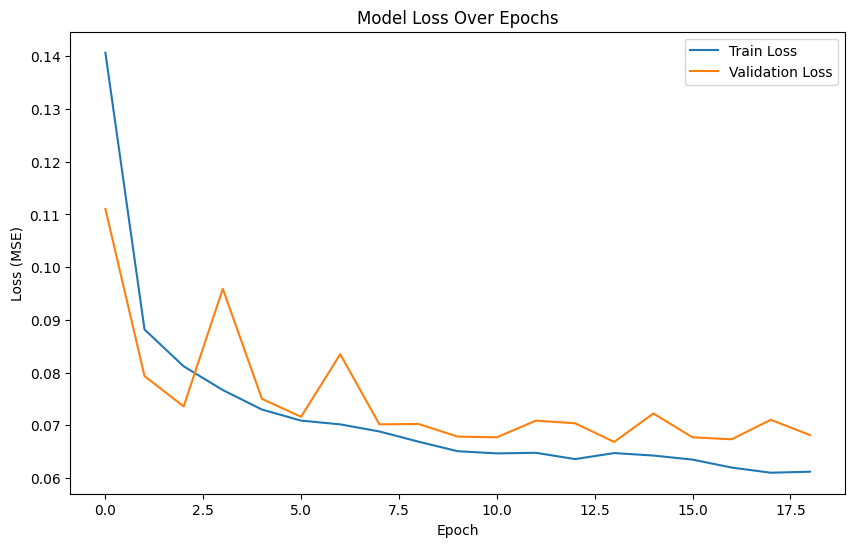

143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
--- Model Evaluation ---
✅ Final Validation RMSE: 0.26


In [4]:
final_rmse = evaluate_model(history, model, X_val, y_val)

## 4. Log Experiment and Generate Submission


In [5]:
# --- Define Parameters for Logging and Submission ---
SCALER_TYPE = 'RobustScaler'
LOG_PATH = f'../experiments/metrics/{EXP_ID}_log.txt'
SUBMISSION_FILENAME = f'../submissions/{EXP_ID}_submission.csv'

# Log
log_experiment(
    model=model, history=history, rmse=final_rmse, log_path=LOG_PATH,
    exp_id=EXP_ID, model_type=MODEL_TYPE, sequence_length=N_PAST,
    batch_size=BATCH_SIZE, scaler_type=SCALER_TYPE, optimizer='adam',
    notes="Fifth experiment: Deep hybrid model with stacked Bi-LSTMs, dropout, and a dense head."
)

# Generate Submission
submission_df = generate_submission(
    model_path=MODEL_PATH,
    train_scaled=df_train_scaled,
    scaler=scaler,
    columns_to_scale=features_to_scale,
    N_PAST=N_PAST,
    TARGET_COL=TARGET_COL,
    submission_filename=SUBMISSION_FILENAME
)

print("\n--- Submission File Head ---")
display(submission_df.head())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 48, 256)        │       148,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 48, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 950,981 (3.63 MB)

 Trainable params: 316,993 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 633,988 (2.42 MB)

✅ Comprehensive experiment details logged to: ../experiments/metrics/05_log.txt
✅ Data loaded successfully.
✅ Missing values handled.
✅ Time-based features created.
✅ Advanced features created.


/Users/testsolutions/Documents/school/year3/term2/time-series-forecasting/tsf-repo/notebooks/../src/data_utils.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')
/Users/testsolutions/Documents/school/year3/term2/time-series-forecasting/tsf-repo/notebooks/../src/data_utils.py:74: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')


KeyError: "['pm2.5_lag_24'] not in index"